# Professional Pandas: Indexing with Pandas Iloc

## Introduction to Pandas Iloc

In this post, I describe how Pandas iloc (`.iloc`) can be used for indexing, but I also argue that you rarely need to use it. There are almost always cleaner options.

We start by giving a high-level description of Pandas iloc. Then we discuss each of the possible input types, with examples. And finally, we talk about the dangers of magic numbers (numbers that appear in your code with no explanation). Throughout, I’ll present alternatives to Pandas iloc and describe why I think they’re more useful.

This is the fourth piece in our Professional Pandas series on teaching best practices about writing professional-grade Pandas code, and a follow-up to [a companion piece on Pandas Loc](https://ponder.io/professional-pandas-indexing-with-pandas-loc). If you have questions or topics that you would like to dive into, please reach out on Twitter to [`@ponderdata`](https://twitter.com/intent/follow?screen_name=ponderdata) or [`@__mharrison__`](https://twitter.com/__mharrison__).

## What Is Pandas Iloc?


`.iloc` stands for **integer location**. Often folks says it is used to *subset* a portion of a dataframe or series. We can use it to pull out rows or columns based on location.

You will hear this referred to as a function or a method. Both of those are incorrect. `.iloc` is a *property*, and we leverage the property by using an index operation (this is with square brackets). You are probably familiar with indexing dictionaries, lists, or strings.

For example, to find the first character of a string, we can do this:

```pycon
>>> name = 'Matt'
>>> name[0]
'M'
```

Or we can get the last item in a list with an index of -1:

```pycon
>>> names = ['Paul', 'George', 'Ringo', 'John']
>>> name[-1]
'John'
```

Indexing with `.iloc` differs from indexing with a string or list. A list is one-dimensional while a dataframe is two dimensional and you can slice it in both dimensions at once. `.iloc` takes up to two arguments: the row index selector (required) and an optional column index selector (by passing in a tuple). Pandas recognizes if you pass in a tuple and slices in two dimensions. You can't do this with lists or strings.

Inside the brackets following `.iloc`, you can place a row selector and an optional column selector. The syntax looks like this:

    dataframe.iloc[row_selector, column_selector]

While `.iloc` leverages integer-based indexing, Pandas offers other indexing functions. You can index directly on DataFrames, Series, and GroupBy objects. But you can also use `.loc`.

We discussed label-based indexing with Pandas loc in [our last professional Pandas post](https://ponder.io/professional-pandas-indexing-with-pandas-loc/). Pandas loc uses labels instead of integer positions to select data.

### A Strong Opinion: Don’t Use Pandas Iloc in Production

I find myself using `.iloc` for inspection and exploratory data analysis and not for production operations. Generally, I suggest you leverage `.loc` instead of `.iloc` because it is more explicit and less error-prone.

As we go through the many `.iloc` examples in the post, I'll show alternatives that I think are cleaner, but here's one sneak peak: Some people use `.iloc` to pull off the top 10 or bottom 10 entries, but I prefer to use `.head` or `.tail` because they are more explicit.

## What Inputs Does Pandas Iloc Accept?

Given that caveat, let's explore options for `.iloc`. I will try to include real-world examples gleaned from my hard drive.

[The documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) states that we can index with the following values (and what follows are direct quotes):

- An integer, e.g. ``5``.
- A list or array of integers, e.g. ``[4, 3, 0]``.
- A slice object with ints, e.g. ``1:7``.
- A boolean array.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output for indexing (one of the above).
  This is useful in method chains, when you don't have a reference to the
  calling object, but would like to base your selection on some value.
- A tuple of row and column indexes. The tuple elements consist of one of the
  above inputs, e.g. ``(0, 1)``.

Let's see how these work.

## How to Use Pandas Iloc with Each Input Type

### Part 1: Using Pandas Iloc to Index with an Integer (e.g., 5)

Here is an example that pulls out rows of a stock using an integer. Let's load pandas and the data. This data is daily stock data from the first half of 2023.

In [1]:
import pandas as pd

In [2]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/tickers-raw.csv'

price_df = pd.read_csv(url)

In [3]:
price_df

,Date,BRK-B,DIS,F,IBM,MMM,NFLX,PG,QCOM,TSLA,UPS,^GSPC
0,2022-12-22 00:00:00-05:00,302.69,86.67,10.51,137.30,118.20,297.75,150.30,109.25,125.35,172.42,3822.39
1,2022-12-23 00:00:00-05:00,306.49,88.01,10.55,138.05,116.79,294.96,150.72,109.41,123.15,173.79,3844.82
2,2022-12-27 00:00:00-05:00,305.55,86.37,10.41,138.80,116.87,284.17,152.04,108.05,109.10,173.72,3829.25
3,2022-12-28 00:00:00-05:00,303.43,84.17,10.17,136.46,115.00,276.88,150.07,105.59,112.71,170.46,3783.22
4,2022-12-29 00:00:00-05:00,309.06,87.18,10.72,137.47,117.21,291.12,150.69,108.42,121.82,172.56,3849.28
...,...,...,...,...,...,...,...,...,...,...,...,...
119,2023-06-15 00:00:00-04:00,339.82,92.94,14.45,138.40,103.81,445.27,148.45,123.61,255.90,179.00,4425.84
120,2023-06-16 00:00:00-04:00,338.31,91.32,14.42,137.48,104.54,431.96,149.54,122.68,260.54,178.58,4409.59
121,2023-06-20 00:00:00-04:00,338.67,89.75,14.22,135.96,102.30,434.70,148.16,119.82,274.45,177.27,4388.71
122,2023-06-21 00:00:00-04:00,338.61,88.64,14.02,133.69,101.47,424.45,149.44,115.76,259.46,173.63,4365.69


Here is the [code example](https://github.com/PacktPublishing/Algorithmic-Short-Selling-with-Python-Published-by-Packt/blob/main/Chapter%2013/Chapter%2013.ipynb), from the book [Algorithmic Short Selling with Python](https://github.com/PacktPublishing/Algorithmic-Short-Selling-with-Python-Published-by-Packt). The first row stores the *Cost* of the stock in another dataframe. The last row gets the current *Price* of a stock. (Don't try to run this one -- We haven't initialized a dataframe called `port`, so you'll get an error.)

```
port['Cost'] = price_df.iloc[0,:]
port['Price'] = price_df.iloc[-1,:]
```


You can see that the `0` and `-1` are the row selectors. This first example should pull out the first row. Because pandas doesn't really have a datatype for a row, it presents it as a series.


In [4]:
price_df.iloc[0,:]

Date     2022-12-22 00:00:00-05:00
BRK-B                       302.69
DIS                          86.67
F                            10.51
IBM                          137.3
MMM                          118.2
NFLX                        297.75
PG                           150.3
QCOM                        109.25
TSLA                        125.35
UPS                         172.42
^GSPC                      3822.39
Name: 0, dtype: object

The author of this code included a slice for the column selector as well. The bare slice, `:`, selects all of the columns. (Which is unneeded in this code). This returns a single row of a dataframe. This code does the same without requiring the column selector:

In [5]:
price_df.iloc[0]

Date     2022-12-22 00:00:00-05:00
BRK-B                       302.69
DIS                          86.67
F                            10.51
IBM                          137.3
MMM                          118.2
NFLX                        297.75
PG                           150.3
QCOM                        109.25
TSLA                        125.35
UPS                         172.42
^GSPC                      3822.39
Name: 0, dtype: object

Note that if you pass in a list with 0 in it for the row selector, you get back a dataframe with a single row, which is the type we will explore in the next section:

In [6]:
price_df.iloc[[0]]

,Date,BRK-B,DIS,F,IBM,MMM,NFLX,PG,QCOM,TSLA,UPS,^GSPC
0,2022-12-22 00:00:00-05:00,302.69,86.67,10.51,137.3,118.2,297.75,150.3,109.25,125.35,172.42,3822.39


### Part 2: Using Pandas Iloc to Index with a List or Array of Integers (e.g., [4, 3, 0])

If you pass in a list of integers to the row selector, pandas will return a dataframe with rows from those positions. You can also pass in a list of integer positions for column selectors.

I looked through my hard drive and had a hard time coming up with an example for this. So I searched further, and found one in the Pandas source code.

This is the `test_sort_values_categorical` method that tests if sorting works ([pandas/tests/series/methods/test_sort_values.py](https://github.com/pandas-dev/pandas/blob/main/pandas/tests/series/methods/test_sort_values.py#L149)). It uses `.iloc` to manually re-arrange the rows by hardcoded values so they are in the correct order:

```python
        # multi-columns sort
        # GH#7848
        df = DataFrame(
            {"id": [6, 5, 4, 3, 2, 1], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
        )
        df["grade"] = Categorical(df["raw_grade"], ordered=True)
        df["grade"] = df["grade"].cat.set_categories(["b", "e", "a"])

        # sorts 'grade' according to the order of the categories
        result = df.sort_values(by=["grade"])
        expected = df.iloc[[1, 2, 5, 0, 3, 4]]
        tm.assert_frame_equal(result, expected)
```

This is actually a good use for `.iloc`. It is small, synthetic, and easy to understand. In the real world, I have much bigger data and manually reordering the rows by index wouldn't make sense. Hence the `.sort_values` method.

Note that you can repeat rows or columns using `.iloc`:

In [7]:
vehicle_url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df = pd.read_csv(vehicle_url)

/var/folders/3n/lm78zpj94157wfgyryc9x87h0000gn/T/ipykernel_71159/670654368.py:2: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(vehicle_url)


In [8]:
df

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
41140,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
41141,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
41142,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [9]:
df.iloc[[0,0,1,0], [-1, 1, 1]]

,phevComb,barrelsA08,barrelsA08
0,0,0.0,0.0
0,0,0.0,0.0
1,0,0.0,0.0
0,0,0.0,0.0


### Part 3: Using Pandas Iloc to Index with a Slice Object with Ints (e.g., 1:7)

Generally, when code uses slices with `.iloc`, it is pulling off the first or last rows. `.iloc[:5]` will return the first five rows. Rows from positions 0, 1, 2, 3, and 4. Note that this is the *half-open interval*. It includes the first position (0 if not defined) and up to but not including the last position.

This also works for the column selector. `.iloc[7:20, -5:]` returns 13 rows starting at index position 7 (the eighth row) and the last five columns. One of the nice attributes of the half-open interval is that the length of the result is the end of the slice minus the first part of the slide. 20 minus seven is 13.

A negative index position means count back from the end. You could use `df.iloc[:, 81:83]` if you want the last two columns of a dataframe with 83 columns, or you could use `df.iloc[:, -2:]`. The `-2` could be interpreted as `len(columns)-2` or 81. The bare slice for the row selector, `:`, returns all of the rows.

But again, there are better options than Pandas iloc: 95% of `.iloc` usage with slices of rows can be replaced with `.head` or `.tail` and improve readability substantially.

Here’s a longer example of code I use when doing [principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) visualization. Let’s run PCA on the Fuel Economy data from the US government. (We’ll see Pandas iloc come into play when it comes time to visualize the PCA results.)

In [10]:
from feature_engine import encoding
from sklearn import base, compose, pipeline, preprocessing, set_config
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
set_config(transform_output='pandas')

In [11]:
def tweak_autos(autos):
    cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr',
        'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']

    return (autos
     [cols]
     .assign(cylinders=autos.cylinders.fillna(0).astype('int8'),
             displ=autos.displ.fillna(0).astype('float16'),
             drive=autos.drive.fillna('Other').astype('category'),
             automatic=autos.trany.str.contains('Auto').fillna(0).astype('int8'),
             speeds=autos.trany.str.extract(r'(\d)+').fillna('20').astype('int8'),
             createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',
                ' EST': '-05:00'}, regex=True), utc=True).dt.tz_convert('America/New_York'),
             ffs=autos.eng_dscr.str.contains('FFS').fillna(0).astype('int8')
            )
     .astype({'highway08': 'int8', 'city08': 'int16', 'comb08': 'int16', 'fuelCost08':

              'int16',
              'range': 'int16',  'year': 'int16', 'make': 'category'})
     .loc[:, ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive',
       'fuelCost08', 'make', 'model', 'range', 'createdOn', 'year',
       'automatic', 'speeds', 'ffs']]
    )

class TweakTransformer(base.BaseEstimator, base.TransformerMixin):
    def fit(self, X):
        return self
    def transform(self, X):
        return tweak_autos(X)

def get_pipeline():
    categorical_features = ['drive', 'make', 'model']
    numeric_features = ['city08', 'comb08', 'highway08',
        'cylinders', 'displ', 'fuelCost08',
       'range', 'year', 'automatic', 'speeds', 'ffs']

    num_pipeline = pipeline.Pipeline(steps=[
        ('std', preprocessing.StandardScaler())
    ])

    cat_pipeline = pipeline.Pipeline(steps=[
        ('oh', encoding.OneHotEncoder(top_categories=5, drop_last=True))
    ])

    pipe = pipeline.Pipeline([
        ('tweak', TweakTransformer()),
        ('ct', compose.ColumnTransformer(transformers=[
            ('num', num_pipeline, numeric_features),
            ('cat', cat_pipeline, categorical_features),
            ])),
      ]
    )
    return pipe

def get_pca_pipeline():
    scaler = StandardScaler()
    pca = PCA()
    pl = pipeline.make_pipeline(scaler, pca)
    return pl

With that code in place, let's make our cleanup pipeline to generate the data for machine learning, `X`:

In [12]:
pl = get_pipeline()
X = pl.fit_transform(df)
X

/var/folders/3n/lm78zpj94157wfgyryc9x87h0000gn/T/ipykernel_71159/908100282.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  createdOn=pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00',


,num__city08,num__comb08,num__highway08,num__cylinders,num__displ,num__fuelCost08,num__range,num__year,num__automatic,num__speeds,...,cat__make_Chevrolet,cat__make_Ford,cat__make_Dodge,cat__make_GMC,cat__make_Toyota,cat__model_F150 Pickup 2WD,cat__model_F150 Pickup 4WD,cat__model_Mustang,cat__model_Jetta,cat__model_Truck 2WD
0,0.079809,0.049985,0.064077,-0.939606,-0.930490,-0.553207,-0.060845,-1.484011,-1.486392,-0.113886,...,0,0,0,0,0,0,0,0,0,0
1,-1.185086,-1.253042,-1.358900,3.512290,1.180007,2.271333,-0.060845,-1.484011,-1.486392,-0.113886,...,0,0,0,0,0,0,0,0,0,0
2,0.585768,0.831800,1.098970,-0.939606,-0.785428,-1.240257,-0.060845,-1.484011,-1.486392,-0.113886,...,0,0,1,0,0,0,0,0,0,0
3,-1.058597,-1.253042,-1.617623,1.286342,1.399021,2.271333,-0.060845,-1.484011,0.672770,-0.909896,...,0,0,1,0,0,0,0,0,0,0
4,-0.173170,-0.210621,-0.194646,-0.939606,-0.785428,0.515538,-0.060845,-0.766025,-1.486392,-0.113886,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,0.079809,0.180287,0.193439,-0.939606,-0.785428,-0.705884,-0.060845,-0.766025,0.672770,-0.511891,...,0,0,0,0,0,0,0,0,0,0
41140,0.206299,0.310590,0.452162,-0.939606,-0.785428,-0.782223,-0.060845,-0.766025,-1.486392,-0.113886,...,0,0,0,0,0,0,0,0,0,0
41141,-0.046680,0.049985,-0.065284,-0.939606,-0.785428,-0.553207,-0.060845,-0.766025,0.672770,-0.511891,...,0,0,0,0,0,0,0,0,0,0
41142,-0.046680,0.049985,-0.065284,-0.939606,-0.785428,-0.553207,-0.060845,-0.766025,-1.486392,-0.113886,...,0,0,0,0,0,0,0,0,0,0


Once we have that data, let's send it through our PCA pipeline, which standardizes the data and then feeds it to the PCA algorithm:

In [13]:
pca_pl = get_pca_pipeline()
pca_pl.fit_transform(X)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,0.477062,-2.095174,0.770188,-0.212903,-0.951630,0.676938,-0.238926,0.289078,-0.740275,0.155848,...,0.349791,-0.496253,0.237550,0.038151,0.212713,-0.236530,-0.012753,-0.174440,-0.007384,0.032632
1,-4.268353,0.083709,0.988989,-0.406348,-0.790531,0.107578,-0.072892,0.070620,-0.463815,0.187307,...,-0.679322,2.164472,0.463913,-0.271684,1.396367,0.003845,1.387906,-0.348073,-0.282840,-0.020434
2,2.223967,-2.811101,-0.325520,-0.617319,-0.598618,-1.267804,2.235811,0.444152,0.445463,1.456438,...,0.114138,-0.023109,-0.611794,-0.436919,0.084360,-0.158280,0.081188,-0.178606,0.345765,-0.033851
3,-4.042764,-0.429124,1.000171,-1.017005,-0.974965,-1.251741,2.801752,-0.073256,0.909080,1.261115,...,-0.430511,-0.581322,-0.308522,0.426849,1.287281,0.616496,0.055086,-0.331410,-0.077058,-0.038770
4,-0.139146,-2.032831,-0.538644,-0.316546,1.840327,0.798375,-0.194294,0.064586,-0.862334,0.194610,...,0.510479,-0.051578,0.403818,0.149321,-0.555183,0.342289,-0.105411,0.038149,0.184141,0.019709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,1.377499,-1.709720,-0.699271,0.007333,-0.305877,-0.638405,0.296353,0.026869,0.397360,-0.318153,...,0.376670,0.103955,0.519335,0.167599,-0.254011,-0.122864,-0.182352,-0.038450,-0.003055,-0.039244
41140,1.748701,-2.100211,-0.734197,0.048718,-0.347412,-0.195885,-0.149926,0.314707,-0.301994,0.008568,...,-0.135854,0.938395,0.307274,0.093213,-0.328319,-0.172653,-0.215587,-0.025868,0.035057,-0.001246
41141,0.307412,-1.652104,-0.416253,-0.326038,1.831733,0.360856,0.128497,-0.178601,-0.178784,-0.122508,...,1.101649,-1.133470,0.475791,-0.331684,-0.444559,-0.334098,-0.069290,-0.028727,0.083650,-0.072446
41142,0.450261,-2.073459,-0.552671,-0.268423,1.773376,0.814024,-0.303813,0.101635,-0.884443,0.196430,...,0.564450,-0.309094,0.270824,-0.248844,-0.524381,-0.398215,-0.113874,-0.010273,0.008102,-0.069861


Having run PCA on the data, let's look at the components that make up the weights to calculate the embeddings.

In [14]:
pca_pl.named_steps['pca'].components_[0:2]

array([[ 0.37501081,  0.38968423,  0.39554789, -0.34148913, -0.3483539 ,
        -0.36421128,  0.19347438,  0.0875742 , -0.05200177,  0.07680492,
        -0.03992407,  0.24258046, -0.17168667, -0.11188447,  0.04104331,
        -0.01628179, -0.05080095, -0.03737196, -0.05577404, -0.09616649,
         0.04123887, -0.03649398, -0.03769309, -0.01286445,  0.03708651,
         0.00463668],
       [ 0.05963524,  0.0652074 ,  0.07807361,  0.19236311,  0.17215519,
         0.07042231,  0.08233002,  0.54374148,  0.25799294,  0.3409357 ,
        -0.49177226, -0.16771429,  0.05033319, -0.09918001,  0.292591  ,
         0.20112942, -0.02188441, -0.05225876, -0.09589855,  0.01754167,
        -0.03934466, -0.02033149, -0.03234882, -0.00660427, -0.01698125,
        -0.0693592 ]])

Let's throw that into a dataframe to make it easier to understand. The rows represent the weights for columns for each principal component. The larger weights have more of an impact on the principal components.

In [15]:
def components_to_df(pca_components, feature_names):
    idxs = [f'PC{i}' for i in range(len(pca_components))]
    return pd.DataFrame(pca_components, columns=feature_names,
                            index=idxs)
comps = components_to_df(pca_pl.named_steps['pca'].components_, X.columns)
comps

,num__city08,num__comb08,num__highway08,num__cylinders,num__displ,num__fuelCost08,num__range,num__year,num__automatic,num__speeds,...,cat__make_Chevrolet,cat__make_Ford,cat__make_Dodge,cat__make_GMC,cat__make_Toyota,cat__model_F150 Pickup 2WD,cat__model_F150 Pickup 4WD,cat__model_Mustang,cat__model_Jetta,cat__model_Truck 2WD
PC0,0.375011,0.389684,0.395548,-0.341489,-0.348354,-0.364211,0.193474,0.087574,-0.052002,0.076805,...,-0.050801,-0.037372,-0.055774,-0.096166,0.041239,-0.036494,-0.037693,-0.012864,0.037087,0.004637
PC1,0.059635,0.065207,0.078074,0.192363,0.172155,0.070422,0.082330,0.543741,0.257993,0.340936,...,-0.021884,-0.052259,-0.095899,0.017542,-0.039345,-0.020331,-0.032349,-0.006604,-0.016981,-0.069359
PC2,0.269448,0.235022,0.178760,0.130405,0.186508,0.123961,0.520875,-0.112167,0.020663,-0.230661,...,0.079818,0.162466,0.010807,0.112550,-0.092597,0.155051,0.026904,0.147292,-0.063889,0.046304
PC3,-0.058300,-0.047605,-0.030073,-0.030055,-0.049874,-0.067175,-0.144811,0.074356,-0.011682,0.081386,...,-0.205989,0.670696,-0.139969,-0.198711,-0.051163,0.368876,0.331516,0.367203,0.014556,-0.050755
PC4,0.094409,0.065148,0.012979,-0.003285,0.039323,0.091275,0.254591,-0.028703,0.008091,-0.102726,...,-0.016995,0.085440,-0.074755,0.150861,-0.051971,-0.090184,0.366551,-0.098427,-0.043081,-0.155391
PC5,-0.001744,-0.013347,-0.040367,-0.089788,-0.090728,-0.022989,-0.037843,0.005478,-0.185994,0.129592,...,-0.255115,-0.026015,-0.253430,0.128470,0.558443,-0.020705,0.008228,0.045175,-0.122343,0.557003
PC6,-0.005869,-0.011004,-0.016942,0.009857,-0.029084,0.097046,0.092146,-0.013271,0.187520,-0.068905,...,-0.562595,-0.015842,0.591759,-0.087564,0.025028,0.027689,-0.023483,-0.118452,-0.080499,-0.020996
PC7,0.013157,0.012346,0.008144,-0.026477,-0.001812,-0.029112,-0.024895,-0.005537,-0.121834,0.043158,...,-0.534913,0.000349,0.023151,0.637500,-0.143523,-0.006335,-0.096976,0.116527,0.232454,-0.116135
PC8,0.048254,0.029563,-0.004352,0.048264,0.074928,0.033080,0.096554,-0.007472,0.315386,-0.062031,...,-0.065071,0.046021,0.176185,-0.144408,0.268748,0.192781,0.237998,-0.336729,-0.193076,0.231680
PC9,0.015328,0.015538,0.016504,0.006056,0.004924,0.005898,0.014334,0.022955,-0.131511,0.087898,...,-0.003450,-0.006410,0.349892,-0.205089,-0.013262,-0.582908,0.133290,0.552688,-0.251096,0.062212


We often want to create a bar plot of those weights that have the most impact. However, we have 26 principal components and 26 weights for each of those components. This makes the plot really hard to interpret.

<Axes: >

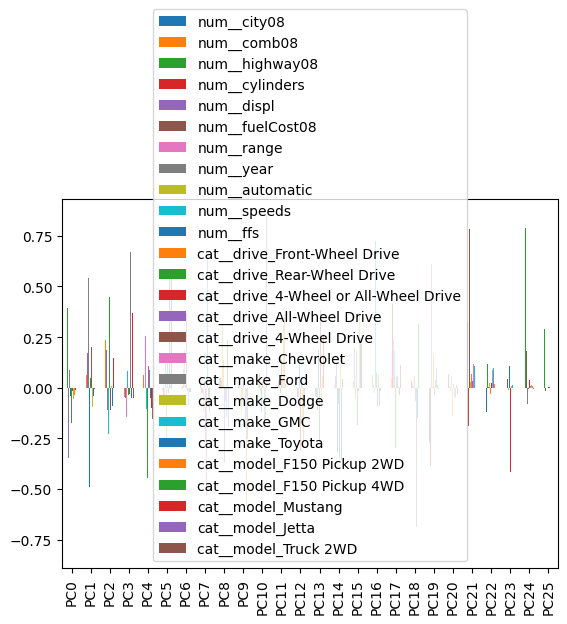

In [16]:
(comps
 .plot.bar()
)

Usually, we will inspect the weights for the first few components. Here, we see `.iloc` pulling out the first three rows!

This is still a little hard to interpret because many columns are included that clutter the plot and make it hard to interpret. Let's limit the components and move the index to the side. (Here’s where Pandas iloc enters the example!)

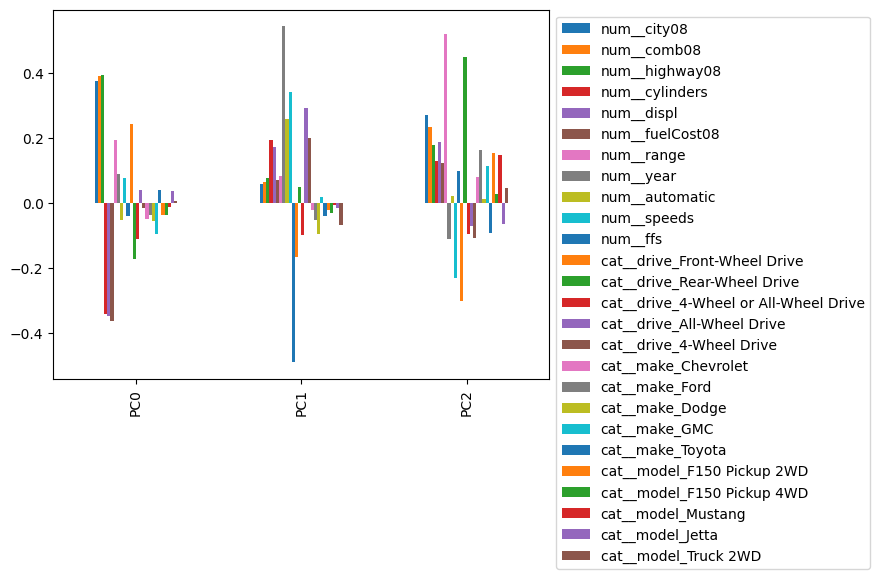

In [17]:
(comps
 .iloc[:3]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1))
)

Let's limit the plot only to show columns whose absolute value exceeds some threshold. We combine `.pipe` with `limit_cols` to perform this operation:

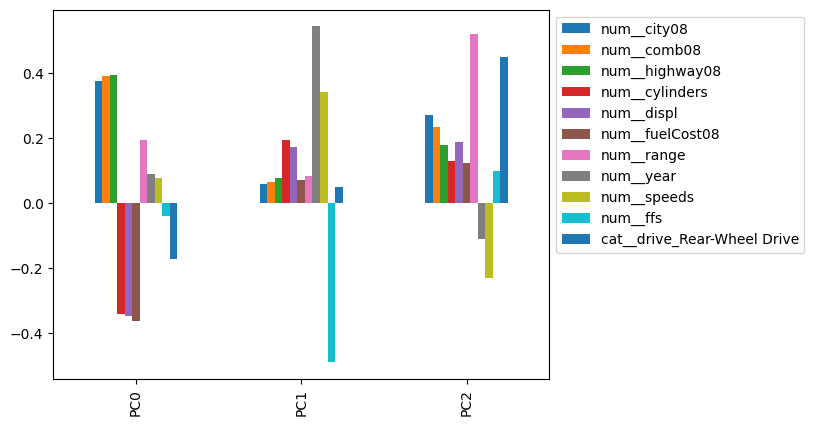

In [18]:
def limit_cols(df_, limit):
    cols = (df_
            .abs()
            .gt(limit)
            .any()
            .pipe(lambda s: s[s].index)
           )
    return df_.loc[:, cols]

(comps
 .iloc[:3]
 .pipe(limit_cols, limit=.32)
 .plot.bar()
 .legend(bbox_to_anchor=(1,1))
)

This looks much better. It appears that *PC0* is impacted most by the city, combined, and highway mileage. *PC1* looks like a proxy for *year*. *PC2* is impacted by *range*, indicating the division between vehicles with electric and combustion engines.

This was an extended example, but probably the most common use I see of `.iloc`: Pulling off the first (or last) few rows.

My preference would be to rewrite the code without pandas iloc, like this:

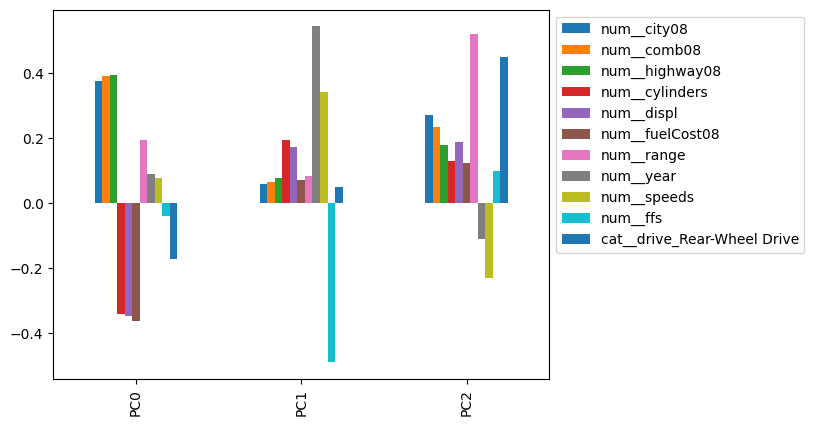

In [19]:
def limit_cols(df_, limit):
    cols = (df_
            .abs()
            .gt(limit)
            .any()
            .pipe(lambda s: s[s].index)
           )
    return df_.loc[:, cols]

num_components = 3

(comps
 #.iloc[:3]
 .head(num_components)
 .pipe(limit_cols, limit=.32)
 .plot.bar()
 .legend(bbox_to_anchor=(1,1))
)

### Part 4: Using Pandas Iloc to Index with a Boolean Array

This is a weird one. Generally, when we speak of *boolean arrays* with Pandas, we refer to a series with the same index as the dataframe (or series) we are working with but with boolean (true / false) values.

Here is a boolean array of vehicles with city mileage above 60:

In [20]:
df.city08 > 60

0        False
1        False
2        False
3        False
4        False
         ...  
41139    False
41140    False
41141    False
41142    False
41143    False
Name: city08, Length: 41144, dtype: bool

Let's see if we can use this boolean array to select the rows of cars with city mileage above 60 in combination with `.iloc`:

In [21]:
df.iloc[df.city08 > 60]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

That doesn't work in Pandas.

In this case, the term *boolean array* (for the `.iloc` docstring) means a list (or NumPy array) with the same length as the number of rows in the dataframe. I'll convert the boolean array to a Python list and try the code again:

In [22]:
df.iloc[list(df.city08 > 60)]

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
7138,0.240,0.0,0.0,0.0,81,0.0000,0,0.0,0.0,41.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
7139,0.282,0.0,0.0,0.0,81,0.0000,0,0.0,0.0,41.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
8143,0.282,0.0,0.0,0.0,81,0.0000,0,0.0,0.0,41.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
8144,0.312,0.0,0.0,0.0,74,0.0000,0,0.0,0.0,46.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
8147,0.270,0.0,0.0,0.0,84,0.0000,0,0.0,0.0,40.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34563,0.156,0.0,0.0,8.5,138,138.1100,0,0.0,0.0,24.4045,...,TSL,standard charger,0.0,80 amp dual charger,Thu May 02 00:00:00 EDT 2019,Thu May 02 00:00:00 EDT 2019,N,0,0,0
34564,0.150,0.0,0.0,9.5,140,140.4200,0,0.0,0.0,24.0030,...,TSL,standard charger,0.0,80 amp dual charger,Thu May 02 00:00:00 EDT 2019,Tue Jun 04 00:00:00 EDT 2019,N,0,0,0
34565,0.180,0.0,0.0,12.0,115,114.9369,0,0.0,0.0,29.3248,...,TSL,standard charger,8.0,72 amp dual charger,Thu May 02 00:00:00 EDT 2019,Tue Jun 04 00:00:00 EDT 2019,N,0,0,0
34566,0.192,0.0,0.0,12.0,104,104.2314,0,0.0,0.0,32.3367,...,TSL,standard charger,8.0,72 amp dual charger,Thu May 02 00:00:00 EDT 2019,Tue Jun 04 00:00:00 EDT 2019,N,0,0,0


That works! However, I have never found that this felt like the tool to reach for to limit rows of data. I prefer the `.query` method:

In [23]:
df.query('city08 > 60')

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
7138,0.240,0.0,0.0,0.0,81,0.0000,0,0.0,0.0,41.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
7139,0.282,0.0,0.0,0.0,81,0.0000,0,0.0,0.0,41.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
8143,0.282,0.0,0.0,0.0,81,0.0000,0,0.0,0.0,41.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
8144,0.312,0.0,0.0,0.0,74,0.0000,0,0.0,0.0,46.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
8147,0.270,0.0,0.0,0.0,84,0.0000,0,0.0,0.0,40.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34563,0.156,0.0,0.0,8.5,138,138.1100,0,0.0,0.0,24.4045,...,TSL,standard charger,0.0,80 amp dual charger,Thu May 02 00:00:00 EDT 2019,Thu May 02 00:00:00 EDT 2019,N,0,0,0
34564,0.150,0.0,0.0,9.5,140,140.4200,0,0.0,0.0,24.0030,...,TSL,standard charger,0.0,80 amp dual charger,Thu May 02 00:00:00 EDT 2019,Tue Jun 04 00:00:00 EDT 2019,N,0,0,0
34565,0.180,0.0,0.0,12.0,115,114.9369,0,0.0,0.0,29.3248,...,TSL,standard charger,8.0,72 amp dual charger,Thu May 02 00:00:00 EDT 2019,Tue Jun 04 00:00:00 EDT 2019,N,0,0,0
34566,0.192,0.0,0.0,12.0,104,104.2314,0,0.0,0.0,32.3367,...,TSL,standard charger,8.0,72 amp dual charger,Thu May 02 00:00:00 EDT 2019,Tue Jun 04 00:00:00 EDT 2019,N,0,0,0


### Part 5: Using Pandas Iloc to Index with a Callable Function

The next option is:

> A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above). This is useful in method chains, when you don't have a reference to the calling object, but would like to base your selection on some value.


Here's another option: passing in a function. You can pass in a function to the index operation or a function for the row selector and/or the column selector. This function should return a single position, a slice, a list, or a tuple of those.

This is very rare in the wild. Here's an example I found: Finding peaks. I'm going to use the `find_peaks` function from the SciPy library.

The `find_peaks` function works with NumPy arrays and Pandas series and returns the index locations where the values are above the neighbors that surround them. (You can customize the behavior to constrain the definition of a "peak" as well. We'll use the out-of-the-box behavior.)


In [24]:
from scipy.signal import find_peaks

In [25]:
find_peaks(price_df.IBM)

(array([  2,   4,   7,   9,  14,  19,  24,  28,  31,  34,  36,  38,  48,
         53,  56,  59,  65,  68,  70,  72,  76,  80,  83,  85,  91,  94,
        103, 107, 117, 119]),
 {})

Note the return type of this is a tuple. This won't work directly with `.iloc`:

In [26]:
price_df.IBM.iloc[find_peaks]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

This is a great place to use `lambda`. Let's use `lambda` to adapt the result of `find_peaks`:

In [27]:
price_df.IBM.iloc[lambda ser: find_peaks(ser)[0]]

2      138.80
4      137.47
7      138.97
9      140.05
14     142.18
19     138.25
24     131.86
28     133.46
31     132.52
34     135.50
36     134.57
38     133.20
48     128.44
53     123.89
56     123.02
59     124.87
65     127.97
68     130.28
70     130.36
72     129.27
76     126.42
80     124.66
83     124.20
85     125.26
91     121.99
94     122.02
103    128.18
107    129.48
117    137.60
119    138.40
Name: IBM, dtype: float64

Ok, that works but what is a real life example? We can use it to highlight peaks in a plot:

0      137.30
1      138.05
2      138.80
3      136.46
4      137.47
        ...  
119    138.40
120    137.48
121    135.96
122    133.69
123    130.91
Name: IBM, Length: 124, dtype: float64

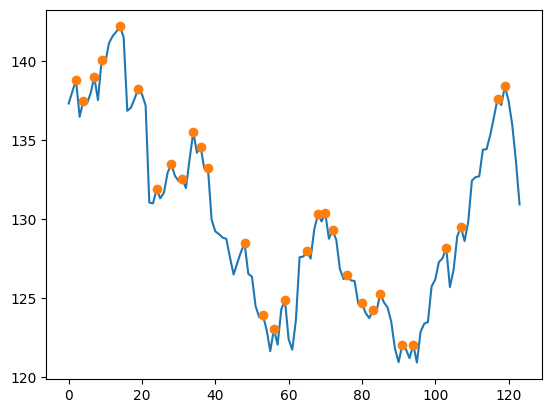

In [28]:
import matplotlib.pyplot as plt

def plot_with_highlights(ser):
    ax = ser.plot()
    ser.iloc[lambda ser: find_peaks(ser)[0]].plot(linestyle='',
                                                  marker='o')
    return ser

(price_df
 .IBM
 .pipe(plot_with_highlights)
)

### Part 6: Using Pandas Iloc to Index with a Tuple

Finally, the documentation suggests we can also pass in *row selectors*. We can do this by passing in a tuple. The docstrings states:

> A tuple of row and column indexes. The tuple elements consist of one of the above inputs, e.g. (0, 1).

I'll note that this only applies to dataframes. Using `.iloc` with series only supports row selectors (because there aren't any columns).

When using `.iloc` with dataframes, these row selectors can be any of the options we provided above. I have presented some examples of these above.

One thing to note. With `.iloc` and a dataframe, you can pull out:

* The value of a single cell as a:
  * Scalar value
  * Column series
  * Row Series
  * Dataframe

* A Column as a:
  * Column series
  * Dataframe
    
* A Row as a
  * Row series
  * Dataframe

* A subset of a Dataframe

Here is an example of how we can change the types of data results.
Looking at our price data, let's pull out the first *BRK-B* value. Here's the whole data:

In [29]:
price_df

,Date,BRK-B,DIS,F,IBM,MMM,NFLX,PG,QCOM,TSLA,UPS,^GSPC
0,2022-12-22 00:00:00-05:00,302.69,86.67,10.51,137.30,118.20,297.75,150.30,109.25,125.35,172.42,3822.39
1,2022-12-23 00:00:00-05:00,306.49,88.01,10.55,138.05,116.79,294.96,150.72,109.41,123.15,173.79,3844.82
2,2022-12-27 00:00:00-05:00,305.55,86.37,10.41,138.80,116.87,284.17,152.04,108.05,109.10,173.72,3829.25
3,2022-12-28 00:00:00-05:00,303.43,84.17,10.17,136.46,115.00,276.88,150.07,105.59,112.71,170.46,3783.22
4,2022-12-29 00:00:00-05:00,309.06,87.18,10.72,137.47,117.21,291.12,150.69,108.42,121.82,172.56,3849.28
...,...,...,...,...,...,...,...,...,...,...,...,...
119,2023-06-15 00:00:00-04:00,339.82,92.94,14.45,138.40,103.81,445.27,148.45,123.61,255.90,179.00,4425.84
120,2023-06-16 00:00:00-04:00,338.31,91.32,14.42,137.48,104.54,431.96,149.54,122.68,260.54,178.58,4409.59
121,2023-06-20 00:00:00-04:00,338.67,89.75,14.22,135.96,102.30,434.70,148.16,119.82,274.45,177.27,4388.71
122,2023-06-21 00:00:00-04:00,338.61,88.64,14.02,133.69,101.47,424.45,149.44,115.76,259.46,173.63,4365.69


Here is a scalar result of the value we want:

In [30]:
price_df.iloc[0, 1]

302.69

We can pull this out as a column. Note that the index stays the same as the original data, and the series has the column name:

In [31]:
# a column (Series)
price_df.iloc[[0], 1]

0    302.69
Name: BRK-B, dtype: float64

Here is the value pulled out as a row. Because pandas doesn't have a row type, it changes the row to a series. The column name moves to the index, and the index value moves to the name of the series.

In [32]:
# a row (converted to a Series)
price_df.iloc[0, [1]]

BRK-B    302.69
Name: 0, dtype: object

Finally, we can get the result as a dataframe.

In [33]:
# A Dataframe
price_df.iloc[[0], [1]]

,BRK-B
0,302.69


What type of value should you pull out of your data? It depends on what you are doing. I find that when I work with row selectors, generally I want dataframes out. When I'm using the `.assign` method, I generally want a column (series) as a result.

## Code Readability and the Danger of Magic Numbers

I’m a huge proponent of writing code that is easy to read, reuse, and share with others. If I have to choose between “easy to write” and “easy to read” code, I will choose easy-to-read every time! In fact, I will often write more code to make it easier to read.

So let’s talk about something that is easy to write, but often makes code hard to read, and comes up a lot when people use Pandas iloc: magic numbers.

In the world of programming, *magic numbers* refer to literal numbers that appear directly in the source code without any explanation. They are “magic” in that they “just work.” Over time, it becomes harder and harder for you (and certainly for your colleagues) to understand why these specific numbers were chosen, which can lead to errors and difficulties when updating or modifying the code.

For instance, consider the following:

```python
selected_data = sales_data.iloc[0:5, 2:4]
```

In this case, 0, 5, 2, and 4 are magic numbers. Did you want the first five rows? Are those five rows specific to data at a particular time? If you run the code later, will the rows be in the same location? Similarly, with the columns? Did you just want the third and fourth column? What if more columns are added? This code might work, but the intent is not clear.

One of the most effective ways to avoid magic numbers is to use meaningful variable names instead. For example, instead of directly using numbers with `.iloc`, we could define variables that describe what these numbers represent:

```python
start_row = 0
end_row = 5
start_column = 2
end_column = 4
selected_data = sales_data.iloc[start_row:end_row, start_column:end_column]
```

In this case, we've replaced the magic numbers 0 and 5 with the variables 'start_row' and 'end_row'. This makes the code much more understandable: it's clear that we're selecting the rows from 'start_row' to 'end_row'.

But my preference, if we wanted the first five rows and two specific columns, would be to avoid Pandas iloc entirely:

```python
num_rows = 5
(sales_data
  .head(num_rows)
  .loc[:, ['Country', 'Sales_Amount']]
)
```

Although this requires more typing, this code makes our intent clear. When doing quick and dirty analysis, I might use the `.iloc` version, but when I start working with others, I will refactor.

## Conclusion

Thanks for reading part two of our ultimate guide to indexing in Pandas. You should now be aware of some of the capabilities of `.iloc`, which lets you pull out rows or columns based on integer location. This property is handy, but it is usually possible (and preferable) to refactor `.iloc` out of our code.

If you liked this, check out our previous Professional Pandas posts on [Pandas loc](https://ponder.io/professional-pandas-indexing-with-pandas-loc/), the [Pandas merge method](https://ponder.io/professional-pandas-the-pandas-merge-method/), and the [Pandas assign method / chaining](https://ponder.io/professional-pandas-the-pandas-assign-method-and-chaining/).

### About Ponder

Ponder is the company that lets you run your Python data workflows (in Pandas or NumPy) securely, seamlessly, and scalably in your data warehouse or database. Sign up for a [free trial](https://app.ponder.io/signup)!